In [1]:
!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score


from sklearn import tree

In [3]:
from sklearn import tree
# train_values = pd.read_csv( 'train_values.csv', index_col='building_id')
# train_labels = pd.read_csv( 'train_labels.csv', index_col='building_id')
cleaned_train_labels = pd.read_csv('../cleaned_train.csv')
# cleaned_train_labels # --> train

train = pd.read_pickle('../cleaned_train.pkl')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   damage_grade                            260601 non-null  int8    
 2   geo_level_1_id                          260601 non-null  int8    
 3   geo_level_2_id                          260601 non-null  int16   
 4   geo_level_3_id                          260601 non-null  int16   
 5   count_floors_pre_eq                     260601 non-null  int8    
 6   age                                     260601 non-null  int16   
 7   area_percentage                         260601 non-null  int8    
 8   height_percentage                       260601 non-null  int8    
 9   land_surface_condition                  260601 non-null  category
 10  foundation_type                 

In [4]:
test = pd.read_pickle('../cleaned_test.pkl')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   building_id                             86868 non-null  int32   
 1   geo_level_1_id                          86868 non-null  int8    
 2   geo_level_2_id                          86868 non-null  int16   
 3   geo_level_3_id                          86868 non-null  int16   
 4   count_floors_pre_eq                     86868 non-null  int8    
 5   age                                     86868 non-null  int16   
 6   area_percentage                         86868 non-null  int8    
 7   height_percentage                       86868 non-null  int8    
 8   land_surface_condition                  86868 non-null  category
 9   foundation_type                         86868 non-null  category
 10  roof_type                               86868 

In [5]:
cat_cols = train.select_dtypes(include=['category']).columns.to_list()
cat_cols

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [6]:
oneHot = pd.get_dummies(train[cat_cols], prefix=cat_cols)
oneHot.transpose()

,0,1,2,3,4,5,6,7,8,9,...,260591,260592,260593,260594,260595,260596,260597,260598,260599,260600
land_surface_condition_n,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
land_surface_condition_o,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
land_surface_condition_t,1,0,1,1,1,1,0,1,1,1,...,0,1,1,1,1,0,1,1,1,0
foundation_type_h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
foundation_type_i,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
foundation_type_r,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
foundation_type_u,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
foundation_type_w,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
roof_type_n,1,1,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,0,1
roof_type_q,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
train = train.drop(columns=cat_cols)
train

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,True,...,False,False,False,False,False,False,False,False,False,False
1,28830,2,8,900,2812,2,10,8,7,False,...,False,False,False,False,False,False,False,False,False,False
2,94947,3,21,363,8973,2,10,5,5,False,...,False,False,False,False,False,False,False,False,False,False
3,590882,2,22,418,10694,2,10,6,5,False,...,False,False,False,False,False,False,False,False,False,False
4,201944,3,11,131,1488,3,30,8,9,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,False,...,False,False,False,False,False,False,False,False,False,False
260597,669485,3,17,715,2060,2,0,6,5,False,...,False,False,False,False,False,False,False,False,False,False
260598,602512,3,17,51,8163,3,55,6,7,False,...,False,False,False,False,False,False,False,False,False,False
260599,151409,2,26,39,1851,2,10,14,6,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
train = pd.concat([train, oneHot], axis=1)
train

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,3,6,487,12198,2,30,6,5,True,...,0,0,0,0,0,0,0,0,1,0
1,28830,2,8,900,2812,2,10,8,7,False,...,0,0,0,0,0,0,0,0,1,0
2,94947,3,21,363,8973,2,10,5,5,False,...,0,0,0,0,0,0,0,0,1,0
3,590882,2,22,418,10694,2,10,6,5,False,...,0,0,0,0,0,0,0,0,1,0
4,201944,3,11,131,1488,3,30,8,9,True,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,False,...,0,0,0,1,0,0,0,0,1,0
260597,669485,3,17,715,2060,2,0,6,5,False,...,0,0,0,0,0,0,0,0,1,0
260598,602512,3,17,51,8163,3,55,6,7,False,...,0,0,0,0,0,0,0,0,1,0
260599,151409,2,26,39,1851,2,10,14,6,False,...,0,0,0,0,0,0,0,0,1,0


In [9]:
oneHot = pd.get_dummies(test[cat_cols], prefix=cat_cols)

test = test.drop(columns=cat_cols)

test = pd.concat([test, oneHot], axis=1)
test

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,300051,17,596,11307,3,20,7,6,False,True,...,0,0,0,0,0,0,0,0,1,0
1,99355,6,141,11987,2,25,13,5,False,True,...,0,0,0,0,0,0,0,0,1,0
2,890251,22,19,10044,2,5,4,5,False,True,...,0,0,0,0,0,0,0,0,1,0
3,745817,26,39,633,1,0,19,3,False,False,...,0,0,0,0,0,0,0,0,1,0
4,421793,17,289,7970,3,15,8,7,False,True,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,False,True,...,0,0,0,0,0,0,0,0,0,1
86864,663567,10,1407,11907,3,25,6,7,True,True,...,0,0,0,0,0,0,0,0,1,0
86865,1049160,22,1136,7712,1,50,3,3,False,True,...,0,0,0,0,0,0,0,0,1,0
86866,442785,6,1041,912,2,5,9,5,True,True,...,0,0,0,0,0,0,1,0,0,0


In [10]:
X = train.drop(columns='damage_grade')
X = X.set_index('building_id')
X

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,True,True,False,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,True,False,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,False,True,False,...,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0


In [11]:
y = train.damage_grade
y

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int8

In [150]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=240)

In [151]:
# make predictions using lightgbm for classification
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
import lightgbm as ltb
    
# define the model
# model1 = ltb.LGBMRegressor(
model1 = ltb.LGBMClassifier(
                       boosting_type='gbdt',
                       num_leaves=10,
#                        max_depth= 150,
                       learning_rate=0.8,
                       n_estimators=500,
#                        num_classes = 1,
                       subsample_for_bin=5000000,
                       objective='regression',
                       class_weight=None,
                       min_split_gain=0.0001,
                       min_child_weight=0.4,
                       min_child_samples=20,
                       subsample=1.0,
                       subsample_freq= 200,
#                        colsample_bytree=0.1,
#                        reg_alpha=0.0005,
#                        reg_lambda=0.1,
#                        random_state= 5000,
                       n_jobs=20,
#                        silent=False,
#                        importance_type='gain'
                       )

# fit the model on the whole dataset
model1.fit(X_train, y_train)

#Prediccion
pred = model1.predict(X_valid)
# print('Predicted Class: %d' % pred[0])

In [152]:
preds_final1 = pred.round().astype('int')
preds_final1

array([2, 2, 3, ..., 2, 2, 2])

In [153]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(preds_final1, y_valid)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_valid, preds_final1)))

LightGBM Model accuracy score: 0.7405


In [154]:
f1_score(y_valid, preds_final1, average='micro')

0.7404550861440466

In [111]:
0.7404550861440466

0.7404550861440466

C:\Users\003568613\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='damage_grade'>

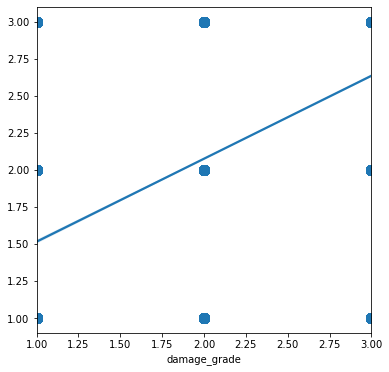

In [160]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.regplot(y_valid, preds_final1, fit_reg=True, scatter_kws={"s": 100})

## Predicción

In [18]:
predicciones = model1.predict(test.iloc[:,1:])
# predicciones = preds.round().astype('int')
predicciones

array([3, 2, 2, ..., 2, 2, 1], dtype=int8)

In [19]:
submission_format = pd.read_csv('../TP1/submission_format.csv', index_col='building_id')
submission_format

,damage_grade
building_id,
300051,1
99355,1
890251,1
745817,1
421793,1
...,...
310028,1
663567,1
1049160,1


In [20]:
my_submission = pd.DataFrame(data=predicciones, columns=submission_format.columns, index=submission_format.index)
my_submission

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3
...,...
310028,2
663567,3
1049160,2


In [21]:
my_submission.to_csv('Submits/LightGBM_Classif.csv')

## Columnas

In [22]:
X

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,True,True,False,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,True,False,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,False,True,False,...,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0


In [35]:
X_2 = X[['count_floors_pre_eq', 'area_percentage', 'height_percentage', 'age']]
X_2

,count_floors_pre_eq,area_percentage,height_percentage,age
building_id,,,,
802906,2,6,5,30
28830,2,8,7,10
94947,2,5,5,10
590882,2,6,5,10
201944,3,8,9,30
...,...,...,...,...
688636,1,6,3,55
669485,2,6,5,0
602512,3,6,7,55


In [96]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_2, y, test_size=0.1, random_state=240)

In [97]:
# define the model
model2 = LGBMClassifier(boosting_type='gbdt',
                       num_leaves=10,
#                        max_depth= 150,
                       learning_rate=0.8,
                       n_estimators=500,
                       subsample_for_bin=5000,
#                        objective='multiclass',
                       class_weight=None,
                       min_split_gain=0.0001,
                       min_child_weight=0.4,
                       min_child_samples=20,
                       subsample=1.0,
                       subsample_freq= 200,
#                        colsample_bytree=0.1,
#                        reg_alpha=0.0005,
#                        reg_lambda=0.1,
#                        random_state= 5000,
                       n_jobs=20,
                       silent=True,
                       importance_type='gain')

# model2 = LGBMClassifier(boosting_type='gbdt',
#                        num_leaves=10,
# #                        max_depth= 150,
#                        learning_rate=0.8,
#                        n_estimators=500,
#                        subsample_for_bin=5000000,
# #                        objective='multiclass',
#                        class_weight=None,
#                        min_split_gain=0.1,
#                        min_child_weight=0.4,
#                        min_child_samples=200,
#                        subsample=1.0,
#                        subsample_freq= 5,
#                        colsample_bytree=1.0,
#                        reg_alpha=0.0,
#                        reg_lambda=0.0,
#                        random_state=None,
#                        n_jobs=- 1,
#                        silent=True,
#                        importance_type='split')

# fit the model on the whole dataset
model2.fit(X_train2, y_train2)

#Prediccion
pred2 = model2.predict(X_valid2)
print('Predicted Class: %d' % pred2[0])

Predicted Class: 2


In [98]:
accuracy2=accuracy_score(pred2, y_valid2)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_valid2, pred2)))

LightGBM Model accuracy score: 0.5798


In [99]:
f1_score(y_valid2, pred2, average='micro')

0.5797551897471317

In [40]:
0.7227274471432409

0.7227274471432409